# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Importing CSV file

In [2]:
df = pd.read_csv('loan.csv')

/Users/shridharkhurana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Cleaning

Removed all columns with 100% null values

In [3]:
df.dropna(axis=1,thresh=len(df.columns),inplace=True)

Removing all the rows with 'Current' as loan status

In [4]:
df = df[~(df['loan_status']=="Current")]

Filled null values of employment length with 0 assuming unemployed or retired

In [5]:
df['emp_length'].fillna(0,inplace=True)

replace_dict = {'<': '',
                'years': '',
                '\+': '',
                'year': '',
                ' ': ''}

df = df.replace({"emp_length": replace_dict}, regex=True)

df['emp_length'] = df['emp_length'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  38577 non-null  float64
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

Dropped all columns that were behavioral and couldn't be known before approval, were redundant, or mostly null.

In [6]:
df.drop(columns=['member_id','desc','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','emp_title','collections_12_mths_ex_med','title','policy_code','initial_list_status','url','delinq_2yrs','id','next_pymnt_d','earliest_cr_line','pymnt_plan','inq_last_6mths','pub_rec','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d','application_type'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              38577 non-null  float64
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  issue_d                 38577 non-null  object 
 13  loan_status             38577 non-null  object 
 14  purpose                 38577 non-null

Converted revolving credit and interest rate from percentage/string to float 

In [7]:
df.revol_util = df.revol_util.str.replace('%','').astype(float)
df.int_rate = df.int_rate.str.replace('%','').astype(float)

Filled bankruptcy null values with 0, the mode

In [8]:
df.pub_rec_bankruptcies.fillna(0,inplace=True)

Since the max months since last delinquint/record is larger than 7 years which is as far back as credit agencies look,
assumed that this variable was generated after loan application and so it isn't useful in this analysis.

In [9]:
df.drop(columns = ['mths_since_last_delinq','mths_since_last_record'],inplace=True)

Created a new column to represent boolean values of loan status to find the mean of charged off across categorical variables

In [10]:
status_dict = {"Fully Paid": 0, "Charged Off": 1}
df['LS_bool'] = df.loan_status.replace(status_dict)

Filled na values for revolving utilization with 0, considering all had revolving balances of 0, except for one row which was dropped aswell

In [11]:
df.revol_util.fillna(0,inplace=True)
df.drop(index=37540,inplace=True)

Dropped funded amount by investors if less than $100

In [12]:
df = df[df['funded_amnt_inv']>100]
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,last_pymnt_amnt,pub_rec_bankruptcies,LS_bool
count,38413.00000,38413.000000,38413.000000,38413.000000,38413.000000,38413.000000,3.841300e+04,38413.000000,38413.000000,38413.000000,38413.000000,38413.000000,38413.000000,38413.000000,38413.000000
mean,11066.20415,10805.702497,10265.992848,11.937267,323.044716,4.929659,6.882123e+04,13.280005,9.275167,13298.750371,48.668804,22.059928,2751.625210,0.042616,0.145211
std,7354.90648,7095.139023,7005.947726,3.696140,208.802447,3.454016,6.428408e+04,6.671679,4.400258,15873.993034,28.393271,11.423683,4501.909398,0.202635,0.352318
min,500.00000,500.000000,106.530000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5300.00000,5200.000000,5000.000000,8.940000,165.820000,2.000000,4.000000e+04,8.140000,6.000000,3660.000000,25.100000,13.000000,217.780000,0.000000,0.000000
50%,9800.00000,9600.000000,8800.000000,11.720000,278.590000,4.000000,5.900000e+04,13.380000,9.000000,8769.000000,49.100000,20.000000,568.380000,0.000000,0.000000
75%,15000.00000,15000.000000,14000.000000,14.420000,426.450000,9.000000,8.200000e+04,18.560000,12.000000,16930.000000,72.300000,29.000000,3454.310000,0.000000,0.000000
max,35000.00000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,44.000000,149588.000000,99.900000,90.000000,36115.200000,2.000000,1.000000


In [13]:
replace_dict = {' months':''}

df = df.replace({"term": replace_dict}, regex=True)

In [14]:
df['term'] = df.term.astype(int)

In [15]:
replace_dict = {'Not Verified':0,
               'Verified':1,
               'Source Verified':1}

df = df.replace({"verification_status": replace_dict}, regex=True)

# Creating New Columns

In [16]:
replace_dict = {'A':700,
                'B':600,
                'C':500,
                'D':400,
                'E':300,
                'F':200,
                'G':100}

df = df.replace({"grade": replace_dict})

replace_dict = {'1':80,
                '2':60,
                '3':40,
                '4':20,
                '5':0}

df = df.replace({"sub_grade": replace_dict}, regex=True)

df['quantified_grade'] = df['grade'] + df["sub_grade"]

In [17]:
df["diff_approved"] = (df['loan_amnt']-df['funded_amnt'])/df['loan_amnt']

# Outliers and Skewness
Removed outliers from home ownership column 'other' and 'none', 101 rows

In [18]:
df = df.loc[df['home_ownership'] != 'OTHER']
df = df.loc[df['home_ownership'] != 'NONE']

replace_dict = {"NONE": 0,"OTHER": 0, "RENT": 1, "MORTGAGE": 2,"OWN": 3}

df = df.replace({"home_ownership": replace_dict})

# Creating a Credit Score for every Member

Creating a new column called Credit Score which consists of 11 total different factors. Generating random weights to check maximum correlation with a person defaulting

In [19]:
import random

correlation = []
weight = []
for i in range(10000):
    a = random.uniform(0.05,0.1)
    b = random.uniform(0.05,0.1)
    c = random.uniform(00.05,0.1)
    d = random.uniform(0.05,0.1)
    e = random.uniform(0.1,0.2)
    f = random.uniform(0.05,0.1)
    g = random.uniform(0.1,0.2)
    h = random.uniform(0.05,0.1)
    i = random.uniform(0.05,0.1)
    j = random.uniform(0.05,0.1)
    k = random.uniform(0.05,0.1)
    l = sum([a,b,c,d,e,f,g,h,i,j,k])
    df["credit_score"] =  (-a*(df.revol_util/df.revol_util.median()) - b*(df.term/df.term.median()) - c*(df.dti/df.dti.mean()) + d*(df.verification_status) + e*(df.last_pymnt_amnt/df.last_pymnt_amnt.median()) - f*(df.diff_approved/df.diff_approved.mean()) + g*(df.grade/df.grade.median()) - h*(df.loan_amnt/df.loan_amnt.median()) + i*(df.emp_length/df.emp_length.median())+ j*(df.annual_inc/df.annual_inc.median()) - k*(df.int_rate/df.int_rate.median()))/l
    correlation.append(float(df["credit_score"].corr(df["LS_bool"])))
    weight.append([a,b,c,d,e,f,g,h,i,j,k])

Checking Maximum negative correlation of the Credit Score with loan_status

In [20]:
min(correlation)

-0.2571473076858914

# Data Visualisation

### Univariate Analysis

Plotted histograms for all numerical variables to see if any would benefit from being converted to log

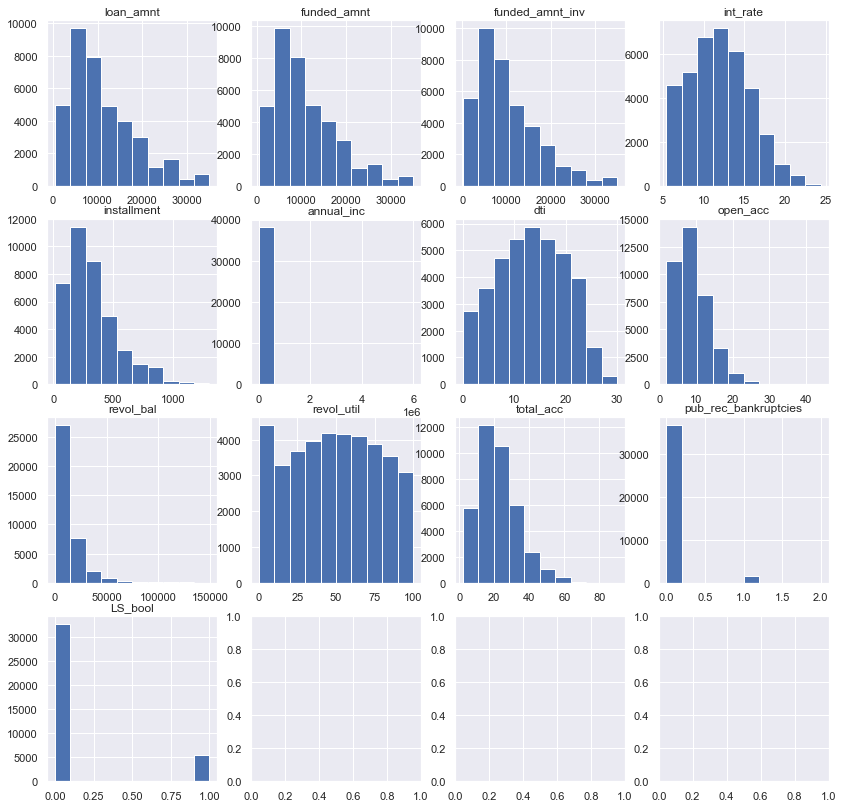

In [1006]:
NumCols = df.select_dtypes(exclude='object')
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(14,14))
for i, column in enumerate(NumCols.columns):
    colors = sns.color_palette('pastel')[0:5]
    NumCols[column].plot(kind='hist',ax=axes[i//4,i%4]).set(title=column,ylabel = None,xlabel=None)

In [1007]:
NumCols.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,LS_bool
count,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,3.831600e+04,38316.000000,38316.000000,38316.000000,38316.000000,38316.00000,38316.000000,38316.000000
mean,11067.124047,10807.138663,10273.047275,11.937014,322.997609,6.881155e+04,13.285201,9.275968,13302.026882,48.686872,22.06128,0.042645,0.145135
std,7358.232124,7098.162324,7009.423314,3.698373,208.831644,6.427900e+04,6.672022,4.401529,15882.718902,28.387380,11.42637,0.202704,0.352242
min,500.000000,500.000000,106.530000,5.420000,15.690000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,2.00000,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.820000,4.000000e+04,8.150000,6.000000,3660.000000,25.200000,13.00000,0.000000,0.000000
50%,9800.000000,9600.000000,8800.000000,11.710000,278.530000,5.900000e+04,13.380000,9.000000,8768.000000,49.100000,20.00000,0.000000,0.000000
75%,15000.000000,15000.000000,14013.422510,14.420000,426.140000,8.200000e+04,18.562500,12.000000,16931.000000,72.300000,29.00000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,44.000000,149588.000000,99.900000,90.00000,2.000000,1.000000


Converted columns which were skewed to log form: annual income, total/open accounts, loan amount, funded amounts, interest rates, installments

In [1008]:
for i in ['loan_amnt','annual_inc','total_acc','open_acc','funded_amnt','funded_amnt_inv','int_rate','installment']:
    NumCols[i] = np.log(NumCols[i])

In [1009]:
NumCols.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,LS_bool
count,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000
mean,9.073884,9.056748,8.978074,2.428840,5.556718,10.969928,13.285201,2.112777,13302.026882,48.686872,2.947620,0.042645,0.145135
std,0.732871,0.722454,0.784981,0.325630,0.703939,0.559917,6.672022,0.494182,15882.718902,28.387380,0.569955,0.202704,0.352242
min,6.214608,6.214608,4.668427,1.690096,2.753024,8.294050,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000
25%,8.575462,8.556414,8.517193,2.190536,5.110903,10.596635,8.150000,1.791759,3660.000000,25.200000,2.564949,0.000000,0.000000
50%,9.190138,9.169518,9.082507,2.460443,5.629526,10.985293,13.380000,2.197225,8768.000000,49.100000,2.995732,0.000000,0.000000
75%,9.615805,9.615805,9.547771,2.668616,6.054768,11.314475,18.562500,2.484907,16931.000000,72.300000,3.367296,0.000000,0.000000
max,10.463103,10.463103,10.463103,3.194583,7.174104,15.607270,29.990000,3.784190,149588.000000,99.900000,4.499810,2.000000,1.000000


Checked skewness/distribution again

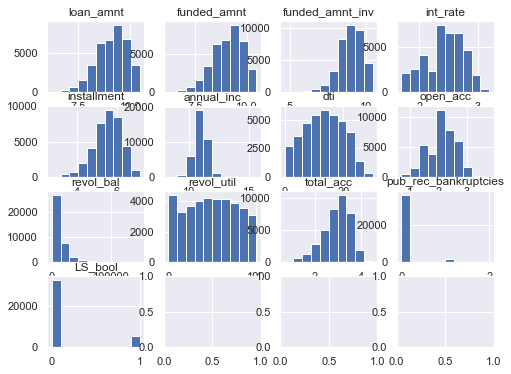

In [1010]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(8,6))
for i, column in enumerate(NumCols.columns):
    NumCols[column].plot(kind='hist',ax=axes[i//4,i%4]).set(title=column,ylabel = None,xlabel=None)

Looked at boxplots of all numerical values

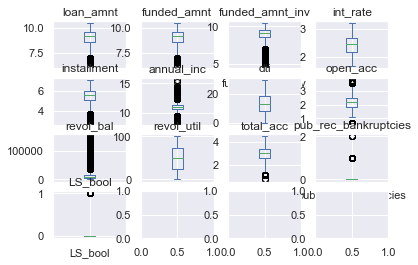

In [1011]:
fig, axes = plt.subplots(nrows=4, ncols=4)
for i, column in enumerate(NumCols.columns):
    NumCols[column].plot(kind='box',ax=axes[i//4,i%4]).set(title=column,ylabel = None,xlabel=None)

Used the quartiles +/- 1.5 * IQR to remove outliers from numerical values with large amounts of outliers. It is important this is done with little skewness as possible.

In [1012]:
for i in ['annual_inc','funded_amnt','funded_amnt_inv','open_acc','loan_amnt','revol_bal','installment','total_acc']:
    Q3 = np.quantile(NumCols[i], 0.75)
    Q1 = np.quantile(NumCols[i], 0.25)
    IQR = Q3 - Q1
    # Upper bound
    upper = (Q3+1.5*IQR)
    # Lower bound
    lower = (Q1-1.5*IQR)
    #Drop Above upper and below lower
    NumCols = NumCols[NumCols[i] <= (Q3+1.5*IQR)]
    NumCols = NumCols[NumCols[i] >= (Q1-1.5*IQR)]
    NumCols = NumCols.reset_index(drop=True)
#sns.boxplot(data=Annual_inc.values).set(title='Annual Income')
#univariate

Un-natural logged the data for Analysis

In [1013]:
for i in ['loan_amnt','annual_inc','total_acc','open_acc','funded_amnt','funded_amnt_inv','int_rate','installment']:
    NumCols[i] = np.exp(NumCols[i])

Created another boxplot after quartiles +/- 1.5 * IQR were removed:

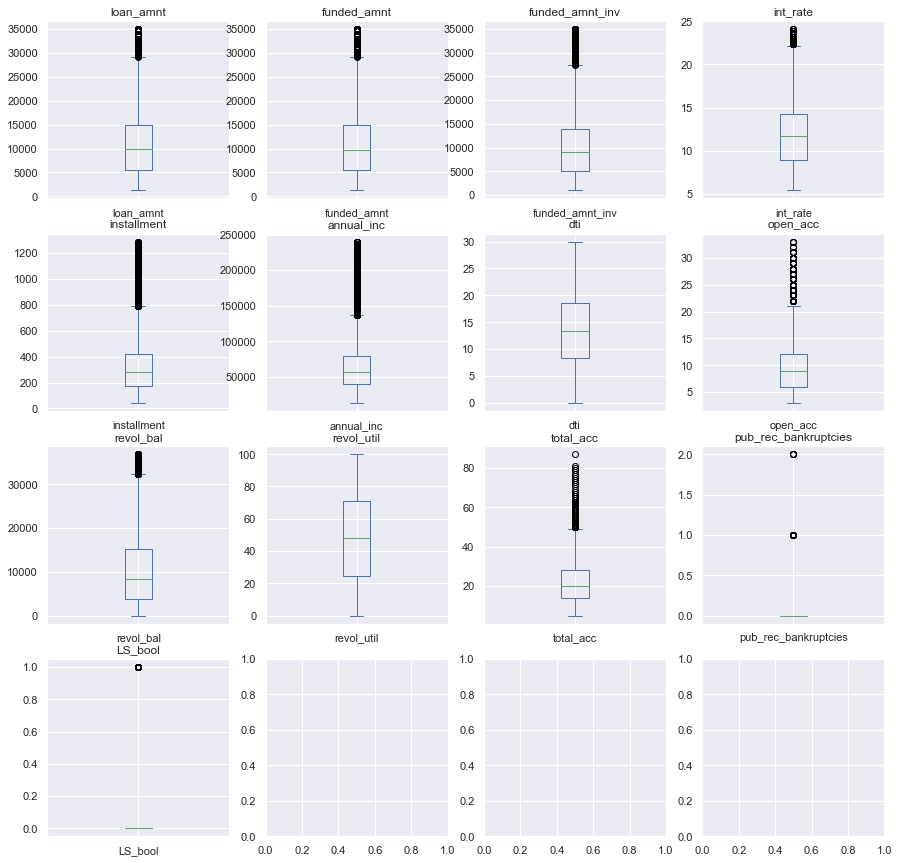

In [1014]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15,15))
for i, column in enumerate(NumCols.columns):
    NumCols[column].plot(kind='box',ax=axes[i//4,i%4]).set(title=column,ylabel = None,xlabel=None)

# Bivariate Analysis

<AxesSubplot:>

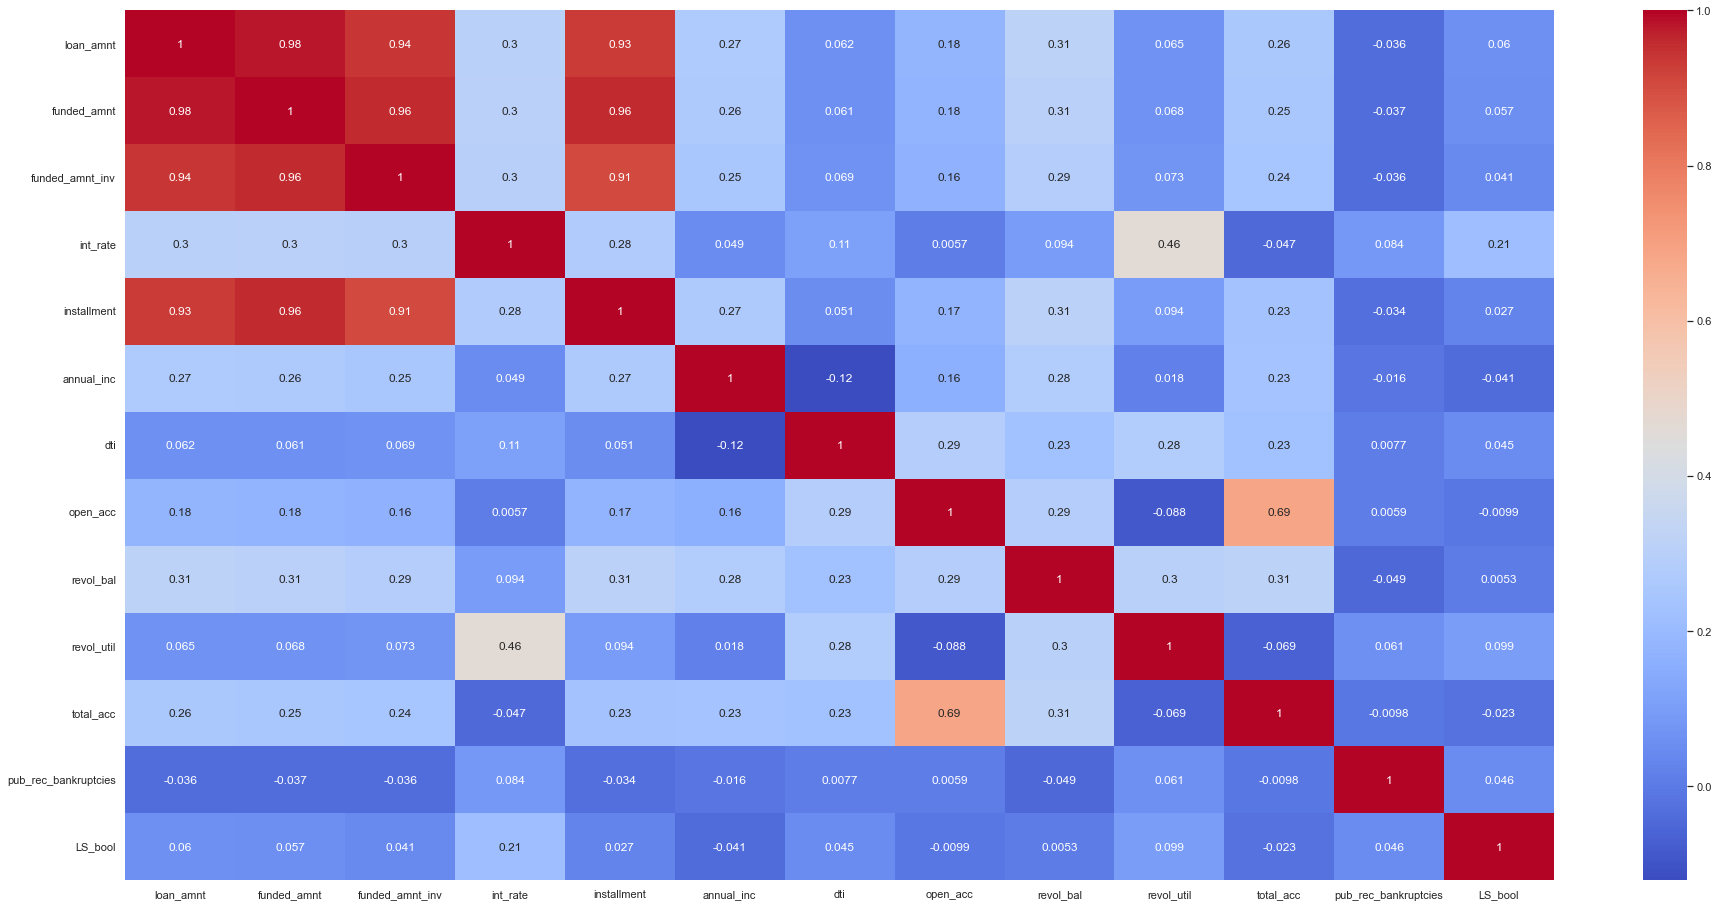

In [1015]:
sns.set(rc = {'figure.figsize':(32,16)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Public record bankruptcies dropped because all p-values are less than .05, very little relationship. Also many probably went bankrupt after approval so it couldn't be known.

In [1016]:
df.drop(columns = ['pub_rec_bankruptcies'],inplace=True)

Created a dataframe for categorical variables

In [1027]:
Categ = df.select_dtypes(include='object')

In [1030]:
Categ.drop(columns='zip_code',inplace=True)

Grouped all categorical variables in ascending order of their mean rate of default

In [1031]:
for i in Categ.columns:
    grp_home = df.groupby(i)
    print(Categ[i].value_counts())
    print(grp_home['LS_bool'].agg([np.sum, np.mean, np.ma.count]).sort_values(by='mean',ascending=True))
    #sum of defaults, mean of defaults, total defaults and non-defaults

 36 months    28836
 60 months     9480
Name: term, dtype: int64
             sum      mean  count
term                             
 36 months  3162  0.109655  28836
 60 months  2399  0.253059   9480
B    11603
A     9980
C     7763
D     5046
E     2652
F      973
G      299
Name: grade, dtype: int64
        sum      mean  count
grade                       
A       597  0.059820   9980
B      1403  0.120917  11603
C      1328  0.171068   7763
D      1102  0.218391   5046
E       713  0.268854   2652
F       317  0.325797    973
G       101  0.337793    299
A4    2856
B3    2808
A5    2697
B5    2605
B4    2420
C1    2034
B2    1986
C2    1918
A3    1793
B1    1784
A2    1499
C3    1482
D2    1278
C4    1190
C5    1139
A1    1135
D3    1105
D1     924
D4     908
D5     831
E1     721
E2     613
E3     513
E4     422
E5     383
F1     305
F2     232
F3     173
F4     151
F5     112
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64
           sum      

Created bar charts for categorical variables by their mean rate of default

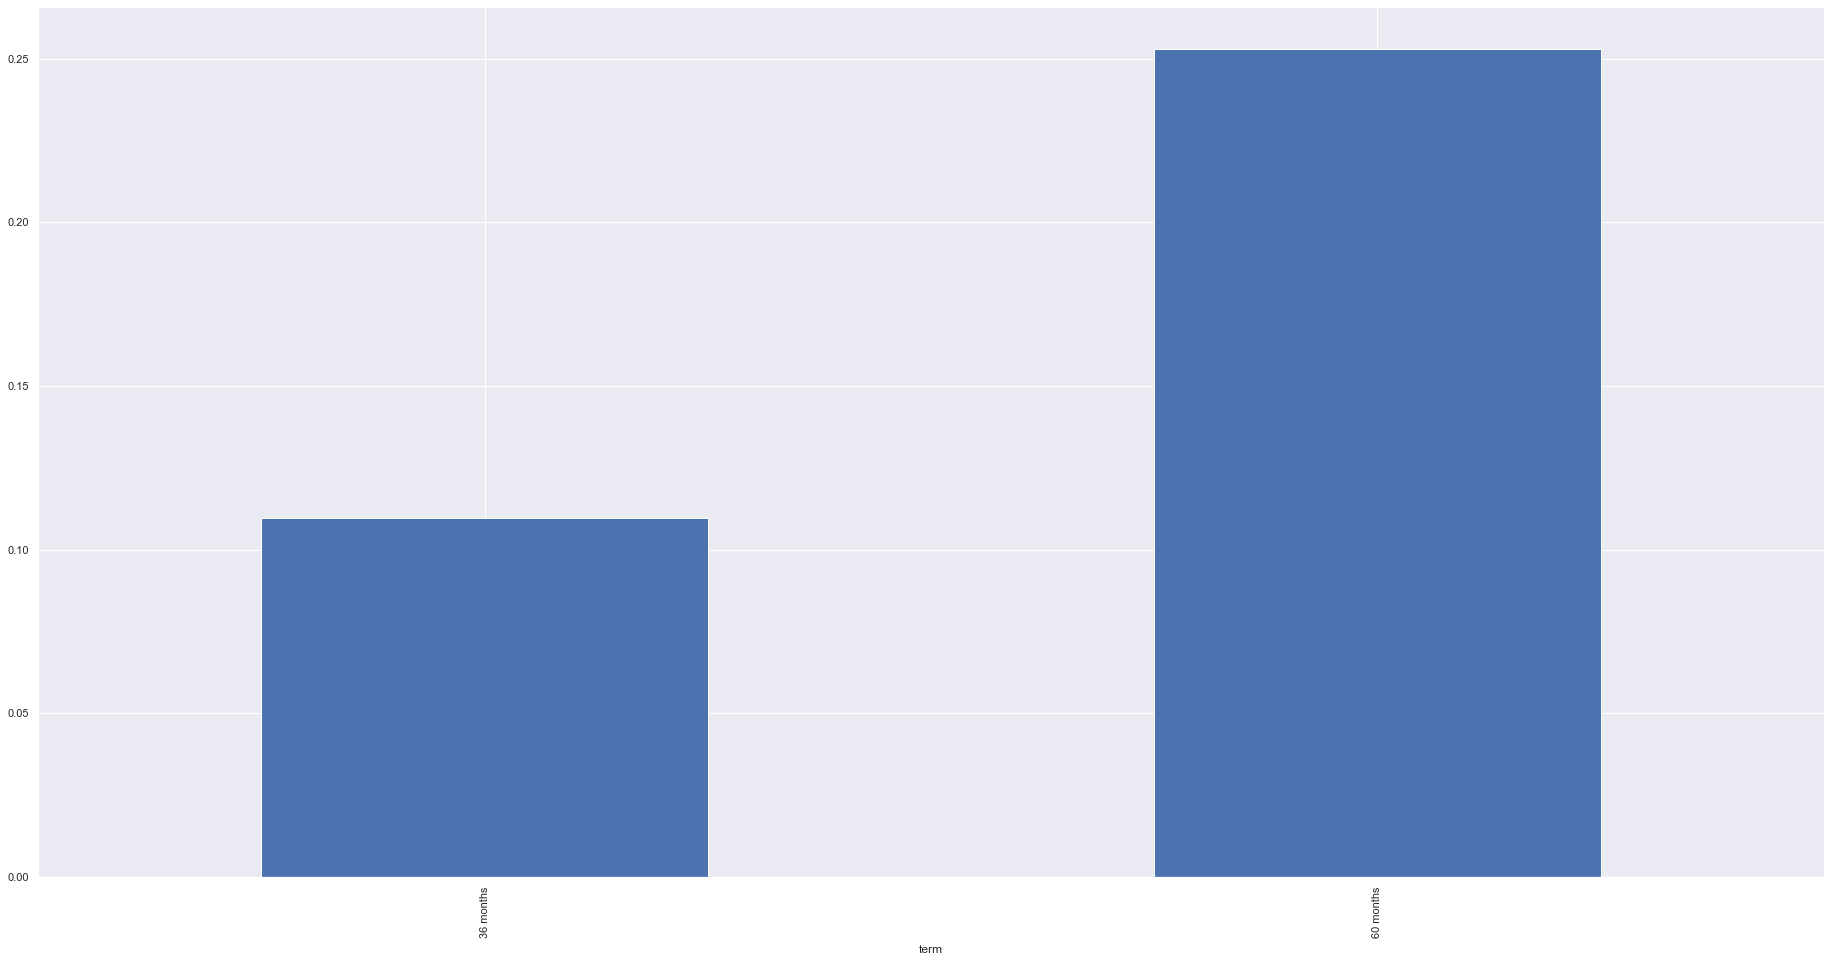

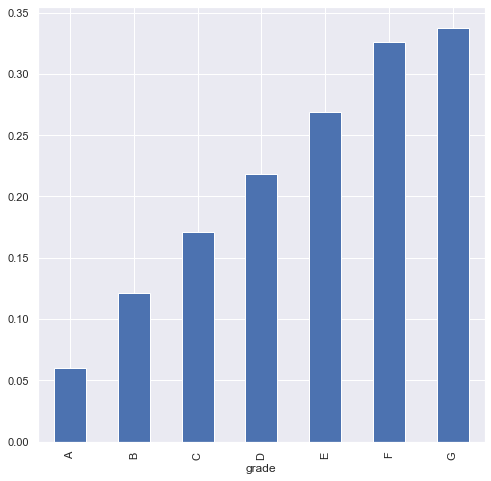

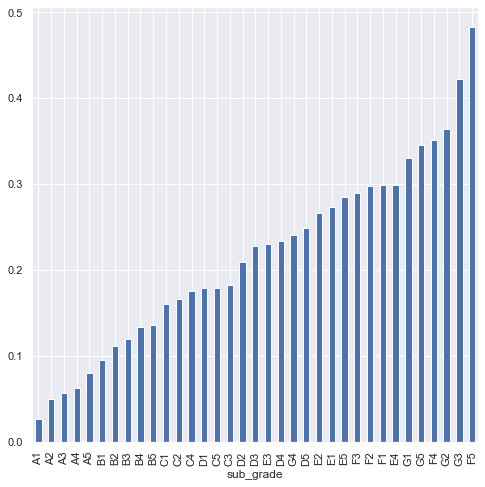

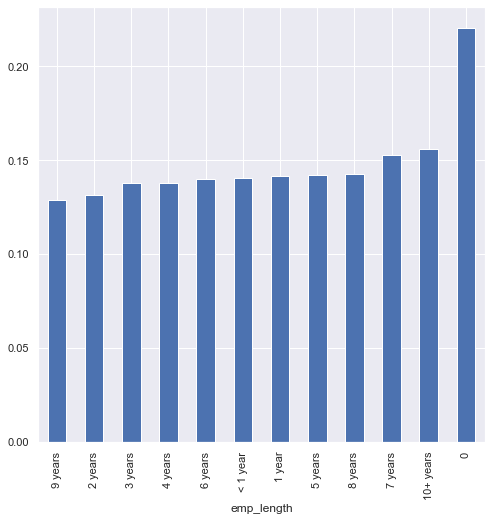

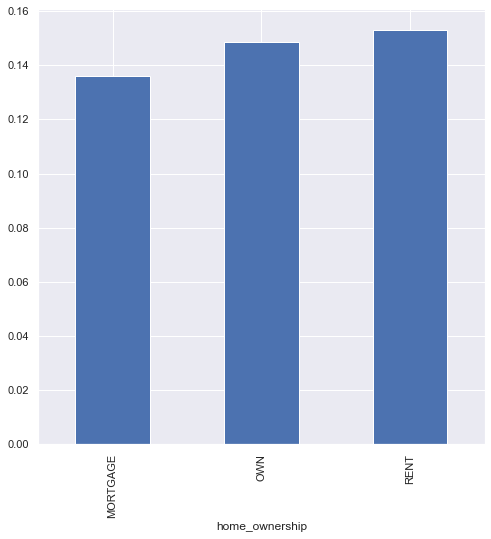

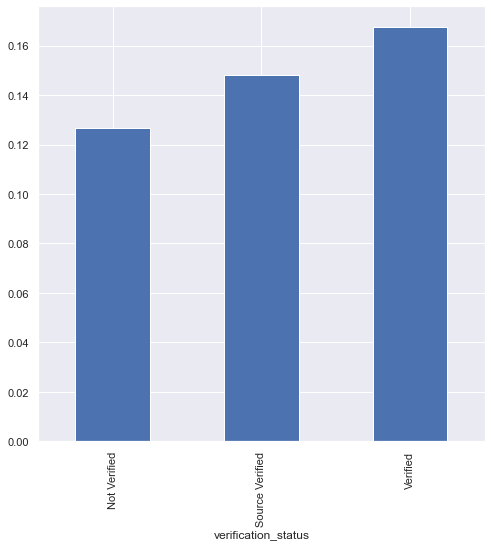

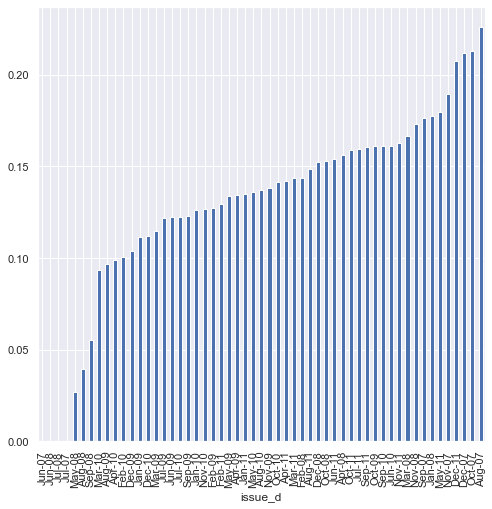

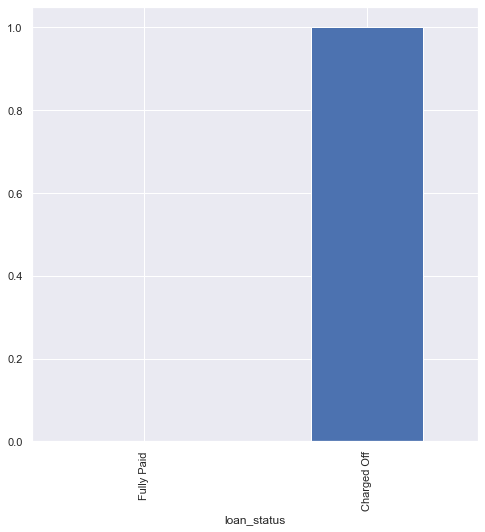

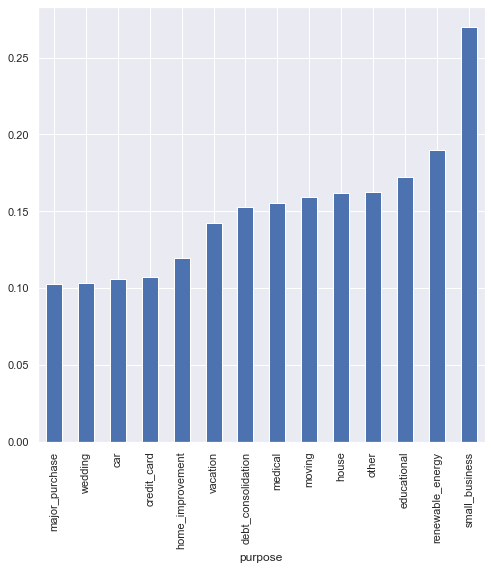

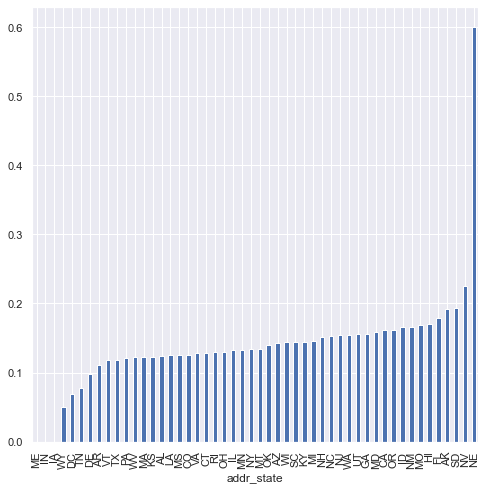

<Figure size 576x576 with 0 Axes>

In [1062]:
for i in Categ.columns:
    grp_home = df.groupby(i)
    grp_home['LS_bool'].agg([np.sum, np.mean, np.ma.count]).sort_values(by='mean',ascending=True)['mean'].plot.bar()
    plt.figure(figsize=(8,8))
    plt.savefig('picture'+str(i)+'.png')

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15,15))
for i, column in enumerate(df.columns):
    grp_home = df.groupby(column)
    grp_home['LS_bool'].agg([np.mean]).sort_values(by='mean',ascending=True)['mean'].plot(kind='bar',ax=axes[i//4,i%4]).set(title=column,ylabel = None,xlabel=None)

<AxesSubplot:xlabel='issue_d'>

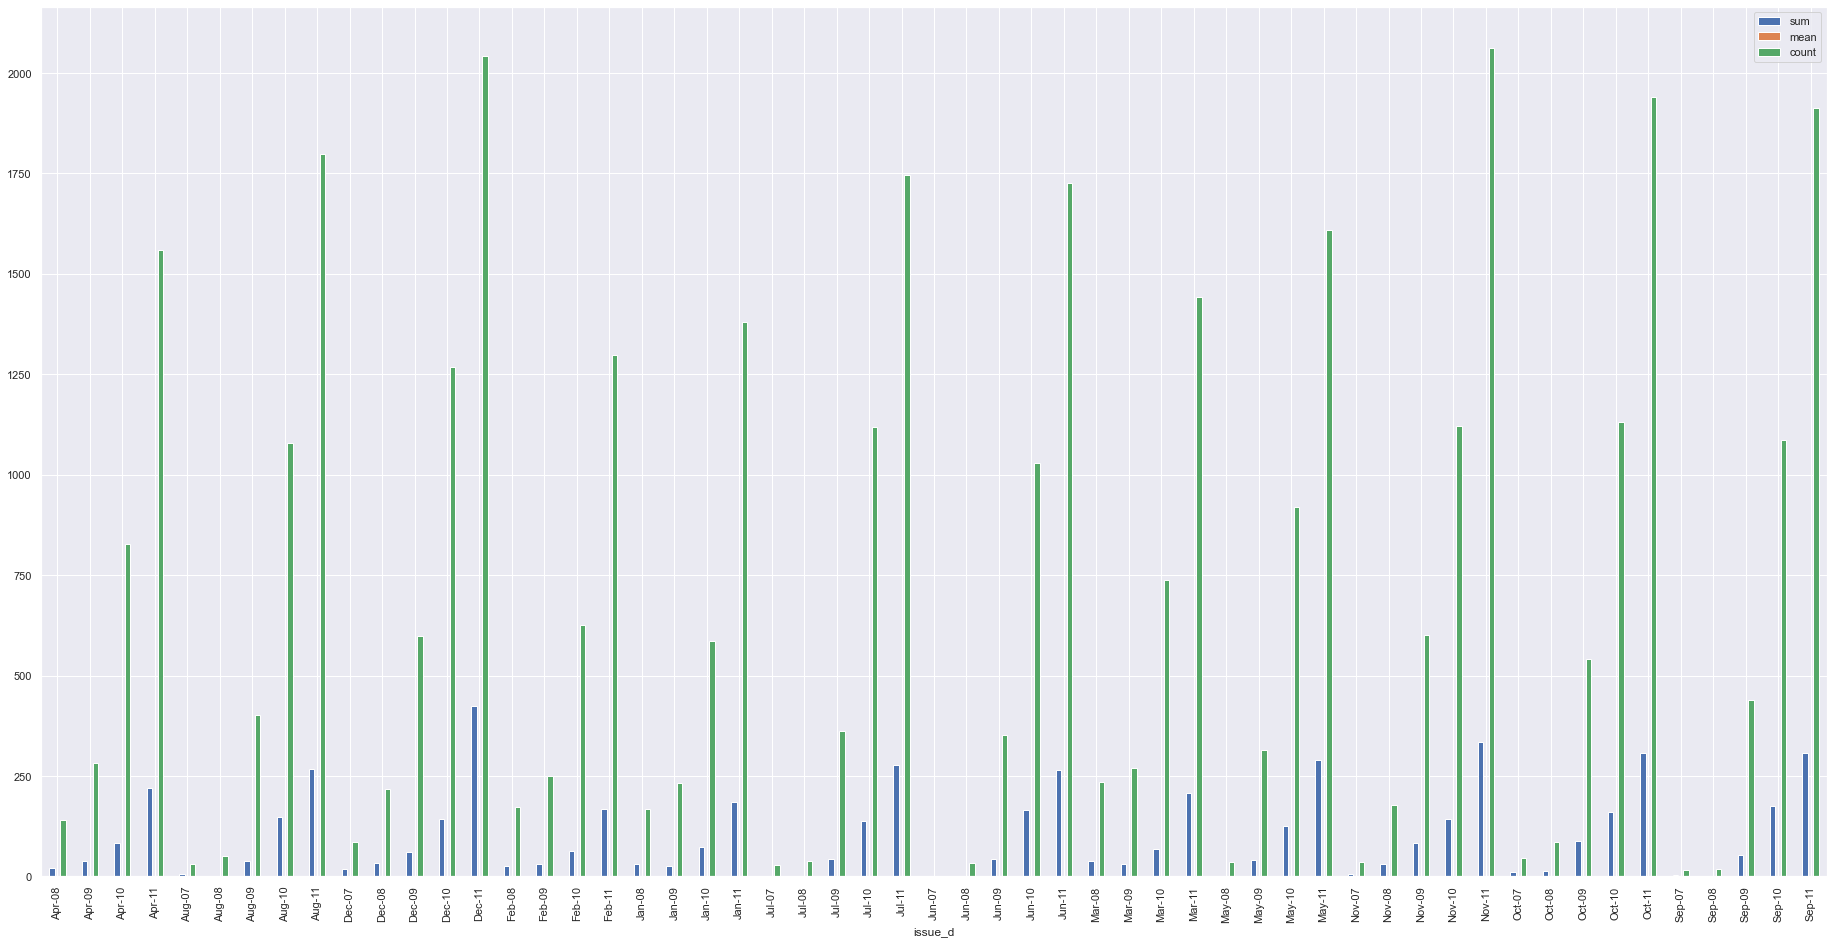

In [1052]:
grp_home = df.groupby(['issue_d'])
grp_home['LS_bool'].agg([np.sum, np.mean, np.ma.count]).plot.bar()